Description: This program uses annual returns and annual risks to build a portfolio using live data using Yahoo Finance

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math

C:\Users\LENOVO\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# determining startdate, end-date and tickers
start_date = input('Please give the start date (YYYY-MM-DD) :' )
end_date = input('Please give the start date (YYYY-MM-DD) :' )

ticker_stocks = ['INTC', 'V', 'PYPL', 'TMUS', 'UNH', 'HUM', 'AAL', 'PFE', 'COF', 'VALE','NVDA', 'AAPL', 'AMZN', 'BAC', 'NOK','IBM','TSLA','BANC' ]

Please give the start date (YYYY-MM-DD) :2017-01-26
Please give the start date (YYYY-MM-DD) :2024-01-26


In [3]:
# Getting data of stock prices
stocks_data = yf.download(ticker_stocks, start_date, end_date)['Adj Close']
stocks_data = pd.DataFrame(stocks_data)
stocks_data.head()

[*********************100%%**********************]  18 of 18 completed


Ticker,AAL,AAPL,AMZN,BAC,BANC,COF,HUM,IBM,INTC,NOK,NVDA,PFE,PYPL,TMUS,TSLA,UNH,V,VALE
Date,,,,,,,,,,,,,,,,,,
2017-01-26,47.920460,28.370817,41.957500,20.062273,13.214067,78.925301,190.549911,123.259583,31.074183,4.080820,27.018629,22.433474,41.500000,63.094570,16.834000,146.803589,79.354942,6.755250
2017-01-27,45.369350,28.373148,41.788502,19.993803,12.699233,78.432625,192.006668,122.321289,31.421658,4.011653,27.541010,22.533882,40.270000,62.148697,16.863333,147.020050,79.860222,6.787055
2017-01-30,43.388359,28.298698,41.519001,19.642885,13.085360,78.133514,189.721542,121.286392,30.958359,3.925195,27.109800,22.454998,39.860001,60.864307,16.708668,146.208237,79.793465,6.558063
2017-01-31,42.760246,28.233543,41.174000,19.377554,13.557289,76.884224,188.997894,120.403328,30.461960,3.907903,26.902813,22.756210,39.779999,61.999352,16.795334,146.217300,78.849693,6.475372
2017-02-01,42.566982,29.955246,41.617500,19.591528,13.728898,76.989761,188.978867,120.244652,30.213774,3.951133,28.078180,22.944578,39.310001,62.985046,16.615999,146.767517,78.592308,6.666198


In [4]:
stocks_data.isnull().sum()

Ticker
AAL     0
AAPL    0
AMZN    0
BAC     0
BANC    0
COF     0
HUM     0
IBM     0
INTC    0
NOK     0
NVDA    0
PFE     0
PYPL    0
TMUS    0
TSLA    0
UNH     0
V       0
VALE    0
dtype: int64

In [5]:
# Calculate daily returns
daily_returns = stocks_data.pct_change(1)
daily_returns = daily_returns.dropna()
daily_returns

Ticker,AAL,AAPL,AMZN,BAC,BANC,COF,HUM,IBM,INTC,NOK,NVDA,PFE,PYPL,TMUS,TSLA,UNH,V,VALE
Date,,,,,,,,,,,,,,,,,,
2017-01-27,-0.053236,0.000082,-0.004028,-0.003413,-0.038961,-0.006242,0.007645,-0.007612,0.011182,-0.016949,0.019334,0.004476,-0.029639,-0.014991,0.001742,0.001474,0.006367,0.004708
2017-01-30,-0.043664,-0.002624,-0.006449,-0.017551,0.030405,-0.003814,-0.011901,-0.008460,-0.014745,-0.021552,-0.015657,-0.003501,-0.010181,-0.020666,-0.009172,-0.005522,-0.000836,-0.033739
2017-01-31,-0.014477,-0.002302,-0.008309,-0.013508,0.036065,-0.015989,-0.003814,-0.007281,-0.016034,-0.004405,-0.007635,0.013414,-0.002007,0.018649,0.005187,0.000062,-0.011828,-0.012609
2017-02-01,-0.004520,0.060981,0.010771,0.011042,0.012658,0.001373,-0.000101,-0.001318,-0.008147,0.011062,0.043689,0.008278,-0.011815,0.015898,-0.010678,0.003763,-0.003264,0.029470
2017-02-02,-0.000908,-0.001709,0.009131,-0.007427,-0.012500,-0.013370,0.004585,0.001664,0.004381,0.054705,0.012637,0.001895,0.006868,-0.033354,0.009268,-0.011985,-0.001698,-0.005725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,-0.011577,0.015533,0.011987,0.015443,0.014587,0.024496,-0.025365,0.027811,0.030167,-0.011527,0.041746,0.006764,0.060074,0.001637,0.001463,-0.024751,0.010293,-0.017094
2024-01-22,-0.002928,0.012163,-0.003605,0.010242,0.050319,0.013283,0.020223,0.007873,0.001454,-0.023324,0.002740,0.001061,-0.031601,-0.004723,-0.015976,0.018727,0.001107,-0.013044
2024-01-23,0.027900,0.006653,0.008011,0.006759,-0.015209,0.000617,-0.005200,0.006422,0.013895,0.002985,0.003671,0.004239,0.016316,-0.003893,0.001628,0.004932,0.000221,0.030103


In [6]:
#Calculate annual returns
annual_returns = daily_returns.mean() * 252
annual_returns

Ticker
AAL    -0.012983
AAPL    0.320985
AMZN    0.246357
BAC     0.126032
BANC    0.107768
COF     0.150815
HUM     0.137982
IBM     0.093664
INTC    0.131562
NOK     0.073303
NVDA    0.572599
PFE     0.058379
PYPL    0.136147
TMUS    0.170933
TSLA    0.525478
UNH     0.210368
V       0.210480
VALE    0.194570
dtype: float64

In [7]:
# Calculate and show annual risks
annual_risks = daily_returns.std() * math.sqrt(252)
annual_risks

Ticker
AAL     0.553846
AAPL    0.301486
AMZN    0.337001
BAC     0.326387
BANC    0.441324
COF     0.390261
HUM     0.311021
IBM     0.249998
INTC    0.359110
NOK     0.406641
NVDA    0.499629
PFE     0.242650
PYPL    0.402198
TMUS    0.266541
TSLA    0.607162
UNH     0.270841
V       0.259942
VALE    0.428651
dtype: float64

In [8]:
# sorting annual returns in descending order
sorted_annual_returns = annual_returns.sort_values(ascending = False)
sorted_annual_returns

Ticker
NVDA    0.572599
TSLA    0.525478
AAPL    0.320985
AMZN    0.246357
V       0.210480
UNH     0.210368
VALE    0.194570
TMUS    0.170933
COF     0.150815
HUM     0.137982
PYPL    0.136147
INTC    0.131562
BAC     0.126032
BANC    0.107768
IBM     0.093664
NOK     0.073303
PFE     0.058379
AAL    -0.012983
dtype: float64

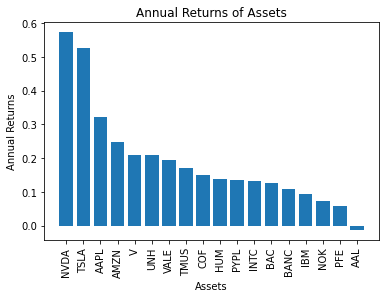

In [9]:
# Plot sorted annual returns
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel('Annual Returns')
plt.xlabel('Assets')
plt.xticks(rotation = 90)
plt.title('Annual Returns of Assets');

In [10]:
data = pd.DataFrame()
data['Expected Annual Returns'] = annual_returns
data['Expected Annual Risks'] = annual_risks
data['Company Tickers'] = data.index
data['Ratio'] = annual_returns/annual_risks

In [11]:
# Sorting the values according to ratio
data = data.sort_values(by = 'Ratio', ascending = False, inplace = False)
data

,Expected Annual Returns,Expected Annual Risks,Company Tickers,Ratio
Ticker,,,,
NVDA,0.572599,0.499629,NVDA,1.146048
AAPL,0.320985,0.301486,AAPL,1.064676
TSLA,0.525478,0.607162,TSLA,0.865466
V,0.210480,0.259942,V,0.809716
UNH,0.210368,0.270841,UNH,0.776721
AMZN,0.246357,0.337001,AMZN,0.731026
TMUS,0.170933,0.266541,TMUS,0.641302
VALE,0.194570,0.428651,VALE,0.453913
HUM,0.137982,0.311021,HUM,0.443642


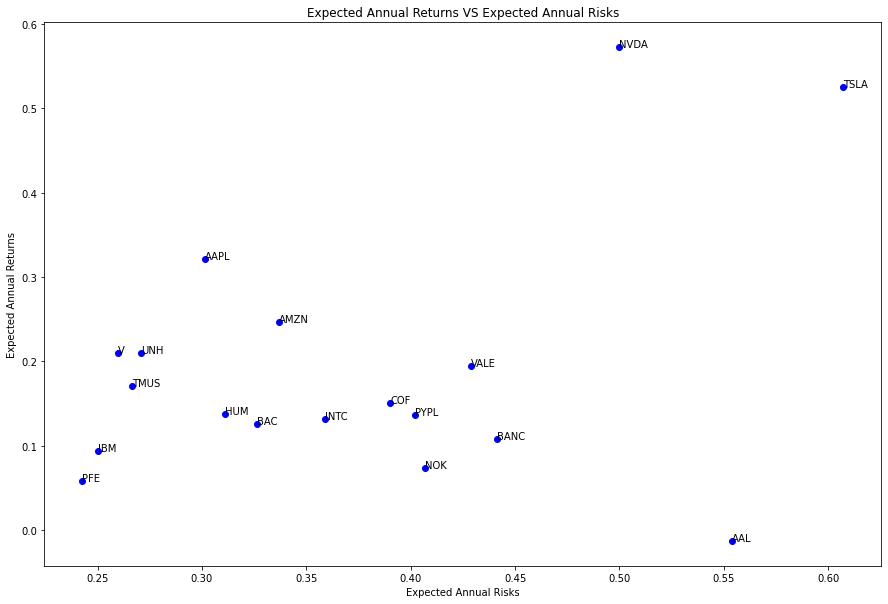

In [12]:
# Visually show expected annual returns vs expected annual risks
fig, ax = plt.subplots(figsize = (15,10))
plt.title('Expected Annual Returns VS Expected Annual Risks')
ax.scatter(data['Expected Annual Risks'], data['Expected Annual Returns'], color = 'blue')
ax.set_xlabel('Expected Annual Risks')
ax.set_ylabel('Expected Annual Returns')

#Annotate points on the plot
for idx, row in data.iterrows():
    ax.annotate(row['Company Tickers'], (row['Expected Annual Risks'], row['Expected Annual Returns']), color = 'black')
    
# show the plot
plt.show()

In [13]:
# Gather list of all stock tickers that have higher risk and lower expected returns
remove_asset_list = []

for ticker in data['Company Tickers'].values:
    no_better_asset_exists = data.loc[(data['Expected Annual Returns'] > data['Expected Annual Returns'][ticker]) & (data['Expected Annual Risks'] > data['Expected Annual Risks'][ticker])].empty
    
    if no_better_asset_exists == False:
        remove_asset_list.append(ticker)

# Show the stock tickers having lower return and more risk than other chosen assets        
remove_asset_list        

['AAPL',
 'V',
 'UNH',
 'AMZN',
 'TMUS',
 'VALE',
 'HUM',
 'COF',
 'BAC',
 'IBM',
 'INTC',
 'PYPL',
 'BANC',
 'PFE',
 'NOK',
 'AAL']

In [14]:
# Show assets which have highest returns and lowest risks
data.drop(remove_asset_list, inplace = True)
data

,Expected Annual Returns,Expected Annual Risks,Company Tickers,Ratio
Ticker,,,,
NVDA,0.572599,0.499629,NVDA,1.146048
TSLA,0.525478,0.607162,TSLA,0.865466


In [15]:
#Redo the calculations for the new portfolio
assets = data.index
num_of_assets = len(assets)

In [16]:
num_of_assets

2

In [17]:
# Calculate simple daily returns for the new portfolio
new_daily_returns = stocks_data[assets].pct_change(1)

# Calculate new annual returns
new_annual_returns = new_daily_returns.mean() * 252

In [18]:
# Create weights
n = 1.0/float(num_of_assets)
weights = [n]*num_of_assets
weights = np.array(weights)

In [19]:
#Show the weights
weights

array([0.5, 0.5])

In [20]:
# Calculate and show covariance matrix
covariance_matrix_annual = new_daily_returns.cov()*252
covariance_matrix_annual

Ticker,NVDA,TSLA
Ticker,,
NVDA,0.249629,0.136826
TSLA,0.136826,0.368645


In [21]:
# Calculate and show the annual variance
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix_annual, weights))
portfolio_variance

0.22298140158397278

In [22]:
# Calculate and show portfolio annual risk and volatility
portfolio_risk = math.sqrt(portfolio_variance)
portfolio_risk

0.4722090655461549

In [23]:
# Calculate and show expected returns
portfolio_expected_annual_returns = np.sum(weights*new_annual_returns)

In [24]:
print('The expected annual returns are', str(round(portfolio_expected_annual_returns*100,2))+'%')
print('The expected annual risk is', str(round(portfolio_risk*100,2))+'%')

The expected annual returns are 54.9%
The expected annual risk is 47.22%
